<a href="https://colab.research.google.com/github/hrcn81/commonplace/blob/main/surplus/20032024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hrcn81/commonplace/main/Datasets/pizza_v1.csv')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [ ]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '')

In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [ ]:
df['price_rupiah'] = df['price_rupiah'].str.replace(',', '.')

In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235.000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198.000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120.000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155.000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248.000,18.0,mozzarella,double_signature,jumbo,yes,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [ ]:
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


In [ ]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [ ]:
x = 0
for i in df.columns:
    x += 1
    print(x,i)

1 company
2 price_rupiah
3 diameter
4 topping
5 variant
6 size
7 extra_sauce
8 extra_cheese


In [ ]:
df['price_rupiah'] = df['price_rupiah'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    float64
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.2+ KB


In [ ]:
df.isna().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [ ]:
df['topping'].nunique()

12

In [ ]:
df.nunique()

company          5
price_rupiah    43
diameter        11
topping         12
variant         20
size             6
extra_sauce      2
extra_cheese     2
dtype: int64

In [ ]:
x = 0
for i in df['topping'].unique():
    x += 1
    print(x,i)

1 chicken
2 papperoni
3 mushrooms
4 smoked beef
5 mozzarella
6 black papper
7 tuna
8 meat
9 sausage
10 onion
11 vegetables
12 beef


In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198.0,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248.0,18.0,mozzarella,double_signature,jumbo,yes,no


In [ ]:
df['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['topping_encoded'] = encoder.fit_transform(df['topping'])

print(df[['topping', 'topping_encoded']].drop_duplicates().sort_values(by='topping_encoded'))

         topping  topping_encoded
73          beef                0
5   black papper                1
0        chicken                2
52          meat                3
4     mozzarella                4
2      mushrooms                5
59         onion                6
1      papperoni                7
55       sausage                8
3    smoked beef                9
49          tuna               10
64    vegetables               11


In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,topping_encoded
0,A,235.0,22.0,chicken,double_signature,jumbo,yes,yes,2
1,A,198.0,20.0,papperoni,double_signature,jumbo,yes,yes,7
2,A,120.0,16.0,mushrooms,double_signature,reguler,yes,yes,5
3,A,155.0,14.0,smoked beef,double_signature,reguler,yes,no,9
4,A,248.0,18.0,mozzarella,double_signature,jumbo,yes,no,4


In [ ]:
x = df[['diameter', 'topping_encoded']]

In [ ]:
x.head()

,diameter,topping_encoded
0,22.0,2
1,20.0,7
2,16.0,5
3,14.0,9
4,18.0,4


In [ ]:
output_col = df[['price_rupiah']]

In [ ]:
output_col.head()

,price_rupiah
0,235.0
1,198.0
2,120.0
3,155.0
4,248.0


In [ ]:
y = df['price_rupiah']

In [ ]:
y.head()

0    235.0
1    198.0
2    120.0
3    155.0
4    248.0
Name: price_rupiah, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 43)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.shape

(90, 2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([11.60663918,  1.45465887])

In [ ]:
lr.intercept_

-71.01411606111014

In [ ]:
pred_value = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
cost = mean_squared_error(y_test,pred_value)

In [ ]:
cost

511.1918398088237

In [ ]:
residuals = y_test - pred_value

In [ ]:
residuals.head()

71   -12.266802
43    34.265753
72    -8.480080
15    -9.527344
2     -1.965405
Name: price_rupiah, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

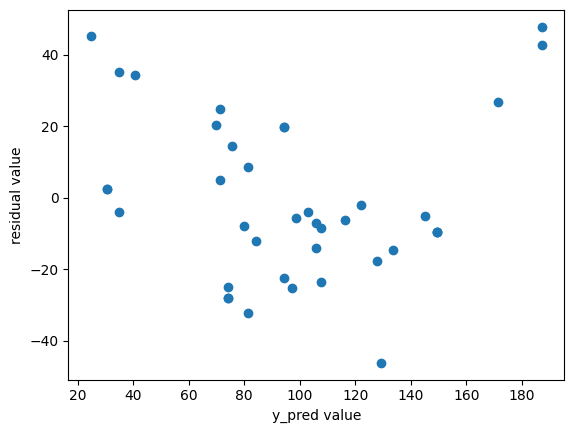

In [ ]:
plt.scatter(pred_value,residuals)
plt.xlabel('y_pred value')
plt.ylabel('residual value')
plt.show()

In [ ]:
import seaborn as sns

<ipython-input-158-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='price_rupiah', ylabel='Density'>

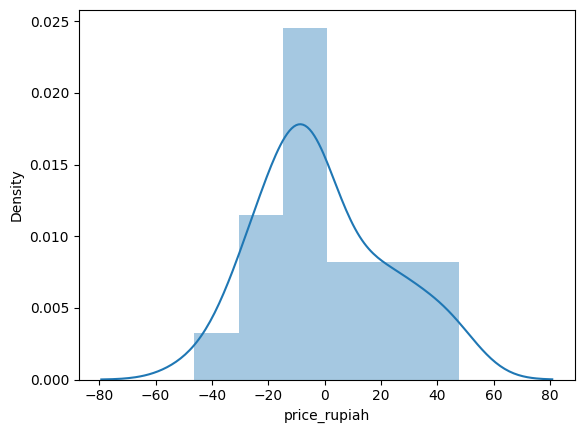

In [ ]:
sns.distplot(residuals)

In [ ]:
import statsmodels.api as sm

In [ ]:
x_with_constant = sm.add_constant(X_train)

x_with_constant

,const,diameter,topping_encoded
31,1.0,8.5,5
119,1.0,12.0,5
39,1.0,14.0,2
54,1.0,14.0,3
90,1.0,12.0,2
...,...,...,...
58,1.0,8.5,5
21,1.0,18.5,5
49,1.0,8.5,10
64,1.0,8.5,11


In [ ]:
model = sm.OLS(y_train,x_with_constant)

In [ ]:
result = model.fit()

In [ ]:
result.params

const             -71.014116
diameter           11.606639
topping_encoded     1.454659
dtype: float64

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           price_rupiah   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     77.11
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           5.43e-20
Time:                        14:33:42   Log-Likelihood:                -420.24
No. Observations:                  90   AIC:                             846.5
Df Residuals:                      87   BIC:                             854.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -71.0141     13.742     

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,pred_value))

0.7628426363350361


In [ ]:
df.describe().round()

,price_rupiah,diameter,topping_encoded
count,129.0,129.0,129.0
mean,87.0,13.0,5.0
std,45.0,3.0,3.0
min,24.0,8.0,0.0
25%,51.0,12.0,2.0
50%,78.0,12.0,5.0
75%,105.0,14.0,9.0
max,248.0,22.0,11.0


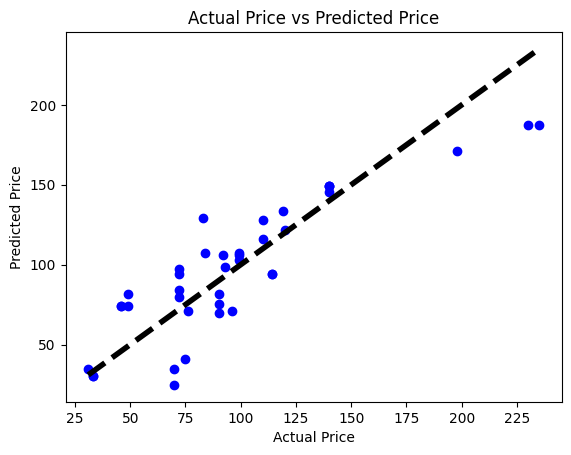

In [ ]:
# Plotting actual vs predicted values
plt.scatter(y_test, pred_value, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()